In [13]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Was ist eine Korrelationsmatrix?
Eine Korrelationsmatrix zeigt die Korrelationen zwischen verschiedenen Variablen in einem Datensatz an.

Jede Zelle in der Matrix stellt die Korrelation zwischen zwei Variablen dar, wobei Werte nahe 1 oder -1 auf eine starke positive oder negative lineare Beziehung hinweisen und Werte nahe 0 auf eine schwache oder keine lineare Beziehung.

In [53]:
data = {
    'Temperature': [22, 24, 26, 28, 30],
    'Humidity': [60, 55, 50, 45, 40],
    'Wind Speed': [5, 7, 9, 6, 8],
    'Rainfall': [1, 0.8, 0.5, 0.2, 0.3],
    'Dummy' : np.random.uniform(-0.01, 0.01, 5),
    'Zeichenkette' : ["name"] * 5
}
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   5 non-null      int64  
 1   Humidity      5 non-null      int64  
 2   Wind Speed    5 non-null      int64  
 3   Rainfall      5 non-null      float64
 4   Dummy         5 non-null      float64
 5   Zeichenkette  5 non-null      object 
dtypes: float64(2), int64(3), object(1)
memory usage: 372.0+ bytes


In [54]:
df.describe()

,Temperature,Humidity,Wind Speed,Rainfall,Dummy
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,26.000000,50.000000,7.000000,0.560000,0.002594
std,3.162278,7.905694,1.581139,0.336155,0.005142
min,22.000000,40.000000,5.000000,0.200000,-0.004448
25%,24.000000,45.000000,6.000000,0.300000,-0.000077
50%,26.000000,50.000000,7.000000,0.500000,0.003940
75%,28.000000,55.000000,8.000000,0.800000,0.004306
max,30.000000,60.000000,9.000000,1.000000,0.009251


In [55]:
#numerical_df = df.select_dtypes(include=[np.number])
numerical_df = df.select_dtypes(include=[int, float])

# Berechnung der Korrelationsmatrix
correlation_matrix = numerical_df.corr()
print(correlation_matrix)
type(correlation_matrix)


             Temperature  Humidity  Wind Speed  Rainfall     Dummy
Temperature     1.000000 -1.000000    0.500000 -0.940721  0.304430
Humidity       -1.000000  1.000000   -0.500000  0.940721 -0.304430
Wind Speed      0.500000 -0.500000    1.000000 -0.423324  0.668216
Rainfall       -0.940721  0.940721   -0.423324  1.000000 -0.005884
Dummy           0.304430 -0.304430    0.668216 -0.005884  1.000000


pandas.core.frame.DataFrame

### 2. Interpretiere die Korrelationsmatrix
In der Matrix bedeuten:

- Werte nahe 1: starke positive Korrelation.
- Werte nahe -1: starke negative Korrelation.
- Werte nahe 0: keine Korrelation.

Wir stellen die Matrix als **Heatmap** dar:
Eine Heatmap der Korrelationsmatrix stellt die Stärke und Richtung der Beziehungen zwischen Variablen in einem Datensatz visuell dar. 

Die Farbskala repräsentiert den Korrelationswert zwischen den Variablen, normalerweise von -1 bis 1.

Positive Korrelationen (in der Regel rot oder eine warme Farbe) zeigen eine Beziehung an, bei der eine Zunahme einer Variablen auch mit der Zunahme der anderen Variablen einhergeht.

Negative Korrelationen (oft in Blau oder kühleren Farben dargestellt) zeigen, dass eine Zunahme einer Variablen mit einer Abnahme der anderen korreliert.

Werte nahe 0 (oft weiß oder neutral) deuten auf eine schwache oder gar keine Korrelation hin.

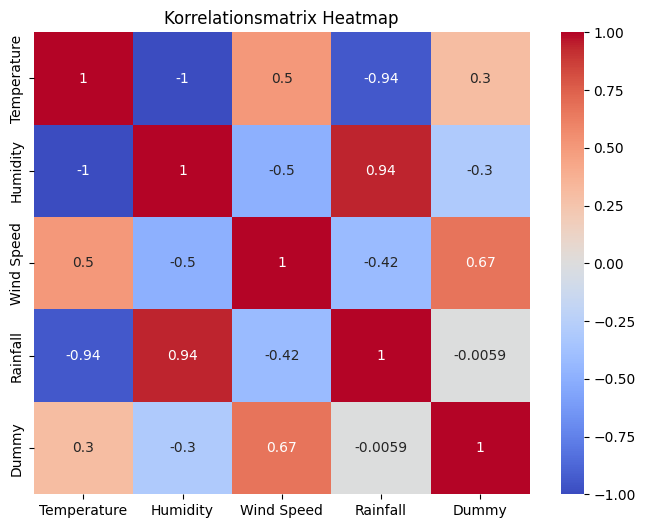

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix Heatmap")
plt.show()

### 3. Linearen Zusammenhang mit einem Regressionsplot visualisieren
Mit einem Regressionsplot kannst du den linearen Zusammenhang zwischen zwei Variablen direkt visuell beurteilen. Für den Plot können wir seaborn verwenden, das eine einfache Möglichkeit zur Erstellung von Regressionsplots bietet.

Regression ist ein statistisches Verfahren, das es ermöglicht, den Zusammenhang zwischen einer abhängigen und einer oder mehreren unabhängigen Variablen zu modellieren. Im Kontext der Korrelationsmatrix, die du erstellt hast, kannst du Regression verwenden, um Vorhersagen zu treffen und die Stärke sowie die Richtung des Zusammenhangs zwischen den Variablen zu quantifizieren.

In dem Beispiel mit den Variablen Temperature, Humidity, Wind Speed und Rainfall könnte man beispielsweise untersuchen, wie Temperatur (abhängige Variable) durch Luftfeuchtigkeit (unabhängige Variable) erklärt werden kann.

Die lineare Regression sucht dabei nach der besten geraden Linie (der Regressionsgerade), die die Daten beschreibt. Dies wird durch den Minimalfehler (also den kleinsten Unterschied zwischen den tatsächlichen und den geschätzten Werten) erreicht.

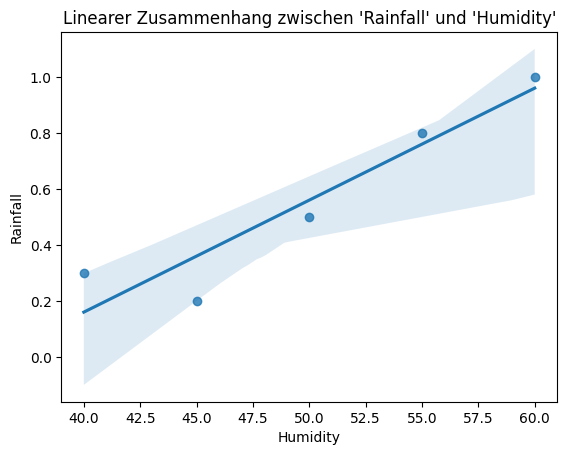

In [37]:
# Regressionsplot für 'Rainfall' und 'Humidity'
sns.regplot(y='Rainfall', x='Humidity', data=df, ci=95)
plt.title("Linearer Zusammenhang zwischen 'Rainfall' und 'Humidity'")
plt.show()


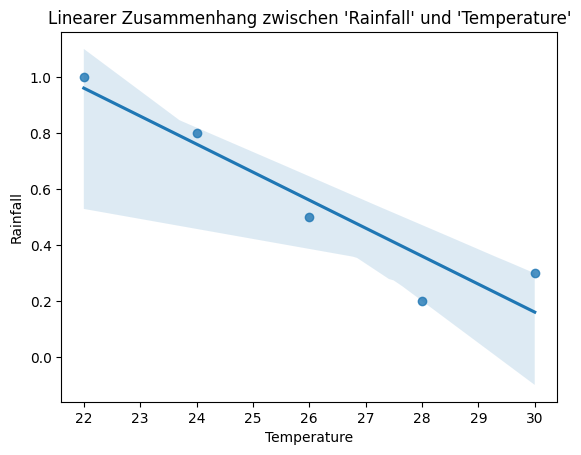

In [38]:
# Regressionsplot für 'Rainfall' und 'Temperature'
sns.regplot(y='Rainfall', x='Temperature', data=df, ci=95)
plt.title("Linearer Zusammenhang zwischen 'Rainfall' und 'Temperature'")
plt.show()

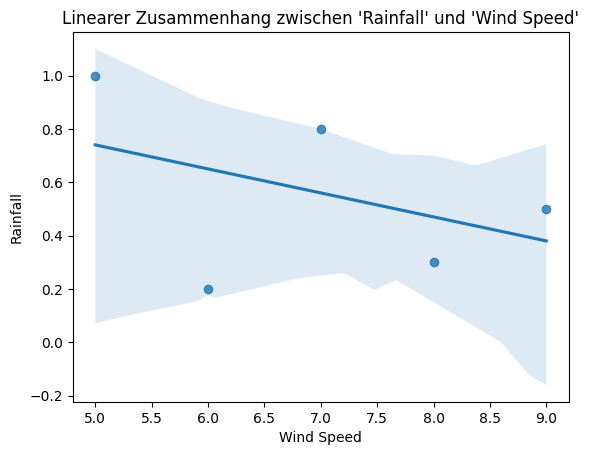

In [39]:
# Regressionsplot für 'Rainfall' und 'Wind Speed'
sns.regplot(y='Rainfall', x='Wind Speed', data=df, ci=95)
plt.title("Linearer Zusammenhang zwischen 'Rainfall' und 'Wind Speed'")
plt.show()

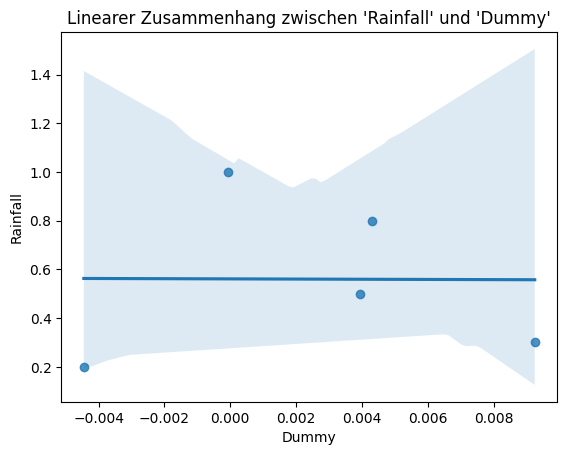

In [57]:
# Regressionsplot für 'Rainfall' und 'Dummy'
sns.regplot(y='Rainfall', x='Dummy', data=df, ci=95)
plt.title("Linearer Zusammenhang zwischen 'Rainfall' und 'Dummy'")
plt.show()

Ein Regressionsplot visualisiert die Beziehung zwischen der abhängigen und der unabhängigen Variablen. Dabei wird auf einem Streudiagramm eine Regressionsgerade eingezeichnet, die den linearen Zusammenhang zwischen den Variablen beschreibt.

Was zeigt der Regressionsplot?<br><br>
Punkte (Datenpunkte): Die einzelnen Punkte auf dem Plot repräsentieren die Werte aus deinem DataFrame. In diesem Fall ist der x-Wert die Luftfeuchtigkeit bzw. Temperatur und der y-Wert die Regenmenge.

Regressionsgerade: Die gerade Linie im Plot stellt das Ergebnis der linearen Regression dar. Sie zeigt den besten linearen Zusammenhang zwischen den beiden Variablen. Eine fallende Gerade erwartet, wenn die beiden Werte negativ korreliert sind , eine steigende Gerade falls sie positiv korrelieren.

Fehlerbalken: Die Fehlerbalken zeigen den Bereich an, in dem die wahre Regressionslinie mit einer bestimmten Wahrscheinlichkeit liegt (z. B. 95%). Dieser Bereich wird als Konfidenzintervall bezeichnet.

Das Konfidenzintervall liefert eine Spanne von möglichen Werten und eine Einschätzung, wie zuverlässig die Schätzung ist. Ein breiteres Intervall bedeutet mehr Unsicherheit, während ein engeres Intervall eine genauere Schätzung bedeutet.